# Visualisation

The glucifer module provides visualisation capabilities for Underworld modelling. It provides a higher level interface to the rendering capabilities provided by [LavaVu](https://github.com/OKaluza/LavaVu), but also performs all the required collation of parallel data back to the root process, where it is then rendered. 

1. Creating figures.
1. Drawing objects within figures.
1. Saving figures to a file.
1. Advanced figure control.
1. The Interactive viewer



## The Figure

The Figure class is the base container object for your glucifer visualisations. It provides the canvas to which you will add the renderings from your drawing objects. Use the `show()` method to render your blank canvas:


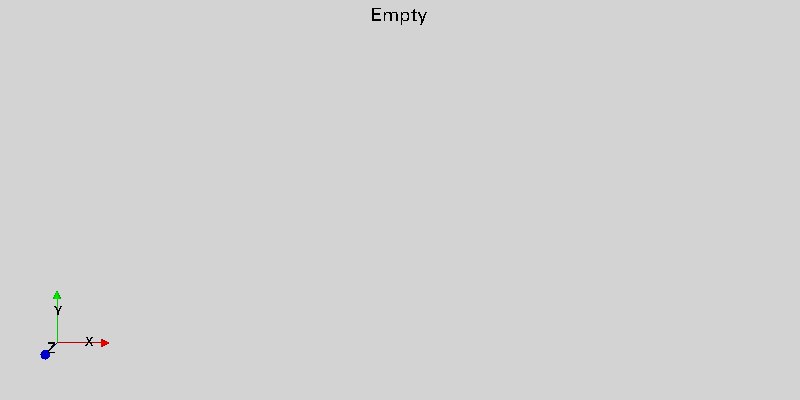

In [1]:
import underworld as uw
import glucifer
newfigure = glucifer.Figure(facecolour="lightgrey", title="Empty",axis=True, figsize=(800,400))
newfigure.show()

## Drawing Objects

Drawing objects are the items that are rendered within a `Figure`. Available drawing objects (and associated documentation) may be found within the `glucifer.objects` submodule or at the glucifer API documentation page. We consider a few of the drawing objects below.

### objects.Mesh

Render mesh geometry and node indices. Note, the `append()` method is used to attach this drawing object to a figure object lists of drawing objects. 


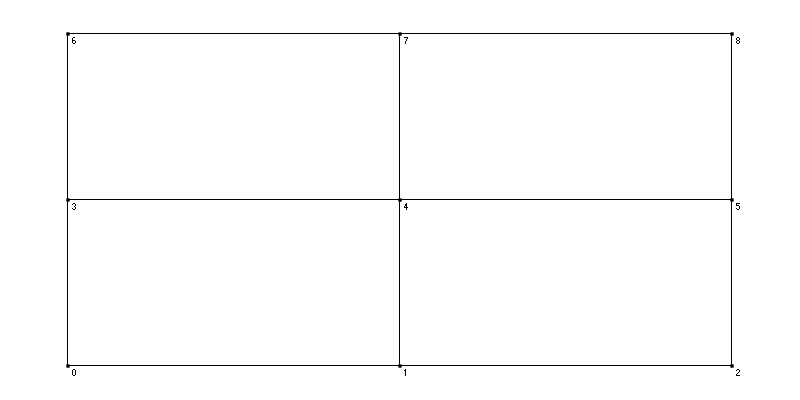

In [2]:
import underworld as uw
import glucifer
fig = glucifer.Figure()

# create mesh and display it
mesh  = uw.mesh.FeMesh_Cartesian( elementRes=(2,2), minCoord=(0.,0.), maxCoord=(2.,1.) )
fig = glucifer.Figure(figsize=(800,400))
fig.append( glucifer.objects.Mesh( mesh, nodeNumbers=True ) )
fig.show()

### objects.Surface

This object will render a provided field across the faces of a mesh object.


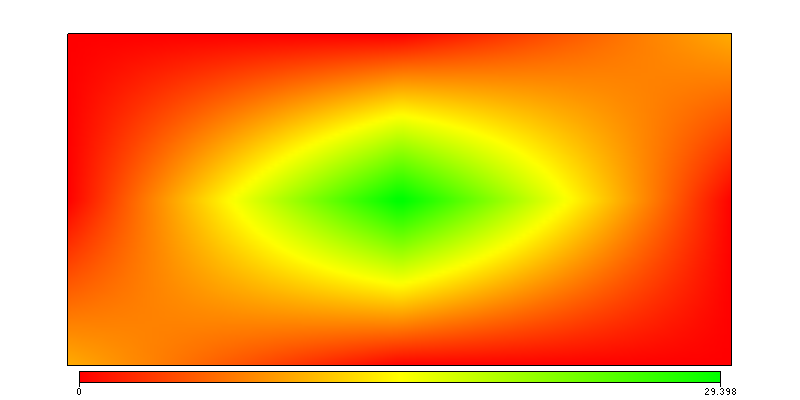

In [3]:
import underworld as uw
import glucifer
fig = glucifer.Figure()
mesh  = uw.mesh.FeMesh_Cartesian( elementRes=(2,2), minCoord=(0.,0.), maxCoord=(2.,1.) )

# create an object with a single value at each mesh point
fevar = mesh.add_variable( 1 )
# give the variable some values
fevar.data[:] = 0.
fevar.data[0] = 10.
fevar.data[4] = 30.
fevar.data[8] = 10.

fig = glucifer.Figure ( edgecolour="black", figsize=(800,400) )
fig.append( glucifer.objects.Surface( mesh, fevar, colours="red yellow green", onMesh=False ) )
fig.show()

### objects.VectorArrows

This object will draw an array of vector arrows across the image using the provided vector field to determine their direction. Check `help(VectorArrows)` for the full options of the VectorArrows drawing object.


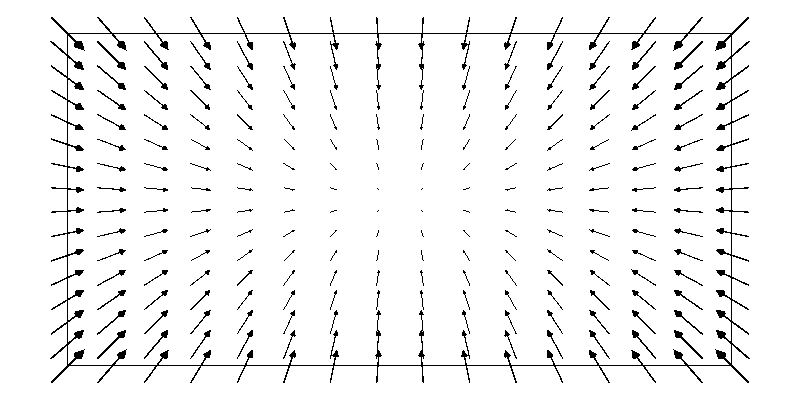

In [4]:
import underworld as uw
import glucifer
fig = glucifer.Figure()
mesh  = uw.mesh.FeMesh_Cartesian( elementRes=(2,2), minCoord=(0.,0.), maxCoord=(2.,1.) )

# create an object with a single value at each mesh point
fevar = mesh.add_variable(2)

# initialise the vector field to something
fevar.data[:] = [ 0., 0.]
fevar.data[0] = [ 1., 1.]
fevar.data[1] = [ 0., 1.]
fevar.data[2] = [-1., 1.]
fevar.data[3] = [ 1., 0.]
fevar.data[5] = [-1., 0.]
fevar.data[6] = [ 1.,-1.]
fevar.data[7] = [ 0.,-1.]
fevar.data[8] = [-1.,-1.]

fig = glucifer.Figure( figsize=(800,400), edgecolour="black" )
fig.append( glucifer.objects.VectorArrows( mesh, fevar, scaling=0.1, arrowHead=0.2 ) )
fig.show()

### glucifer.Points

This object will draw a swarm of points using the provided Underworld swarm for the point locations and an Underworld swarm variable for the point colours (or size or opacity).


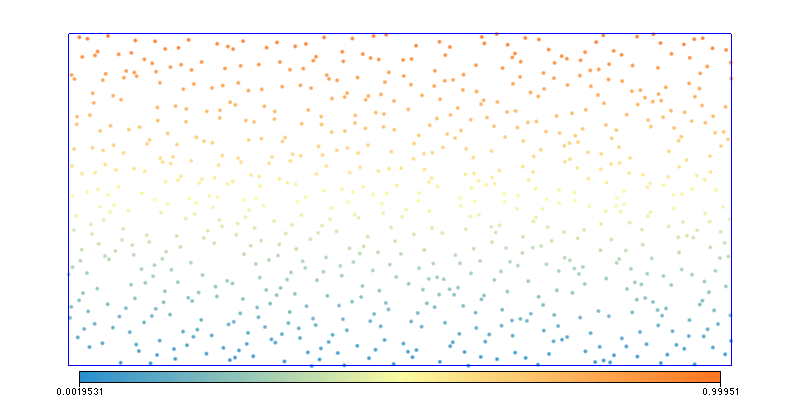

In [5]:
import underworld as uw
import glucifer
fig = glucifer.Figure()
mesh  = uw.mesh.FeMesh_Cartesian( elementRes=(2,2), minCoord=(0.,0.), maxCoord=(2.,1.) )

swarm  = uw.swarm.Swarm( mesh=mesh )
layout = uw.swarm.layouts.PerCellSpaceFillerLayout( swarm=swarm, particlesPerCell=200 )
swarm.populate_using_layout( layout )

# render points, and also colour them by depth
fig = glucifer.Figure( figsize=(800,400), edgecolour="blue" )
fig.append(glucifer.objects.Points( swarm=swarm, fn_colour=uw.function.input()[1], pointSize=5,  ))
fig.show()

Multiple drawing objects can, of course, be layered upon each other to build up complex images. This is achieved by making multiple calls `append()`:


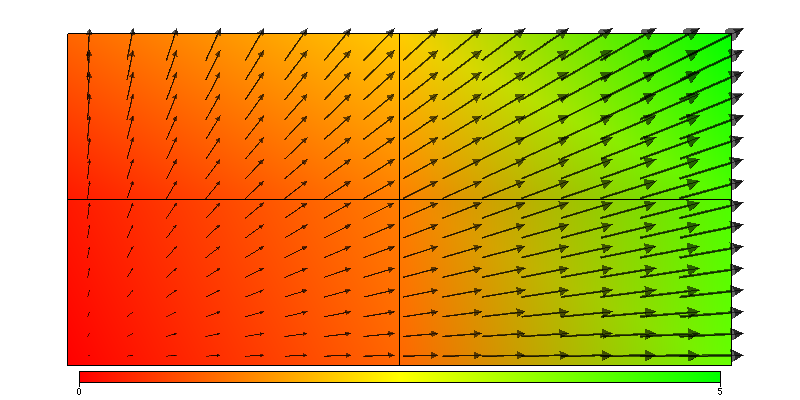

In [6]:
import underworld as uw
import glucifer
fig = glucifer.Figure()
mesh  = uw.mesh.FeMesh_Cartesian( elementRes=(2,2), minCoord=(0.,0.), maxCoord=(2.,1.) )

# create vec field, setting it to coordinate vector
vec = mesh.add_variable(2)
vec.data[:] = mesh.data[:]

fig = glucifer.Figure( figsize=(800,400), edgecolour="black" )
fig.append(glucifer.objects.VectorArrows( mesh, vec, scaling=0.1, arrowHead=0.2, opacity=0.6) )
fig.append(glucifer.objects.Surface( mesh, uw.function.math.dot(vec,vec), colours="red yellow green") )
fig.append(glucifer.objects.Mesh(mesh))
fig.show()

## Saving Results
To output results to raster files (such as PNG), simply use the `savefig()` method.

In [7]:
import underworld as uw
import glucifer
fig = glucifer.Figure()

figfile = fig.save_image("savedfigure")
import glob
import os
# do we have a file?
if figfile: 
    print(glob.glob( figfile ))
    # cleanup
    os.remove( figfile )

['savedfigure.png']


## Advanced Figure Control

Various imaging parameters are provided directly through the `glucifer` API, and the user is encouraged to explore these options interactively and also through the API documentation. Note that for full control of all image parameters, the user should consult the [LavaVu Documentation](https://github.com/OKaluza/LavaVu/wiki). In particular, the [LavaVu Property Reference](https://github.com/OKaluza/LavaVu/wiki/Property-Reference) is useful, as is the [colour maps example notebook](https://github.com/OKaluza/LavaVu/blob/master/notebooks/ColourMaps.ipynb).

We have a quick look at some available options below. 


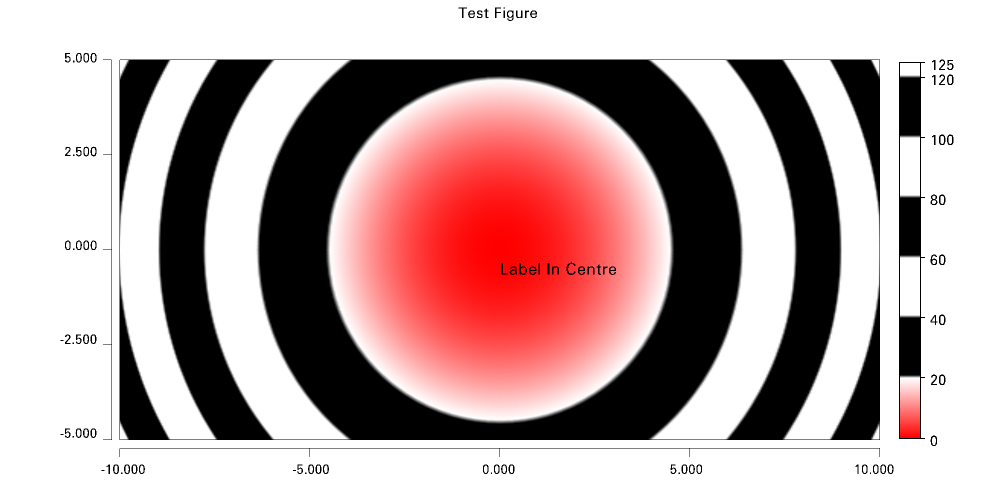

In [8]:
import underworld as uw
import glucifer
import numpy as np

# Create figure, set the margin around the edges of the plot and apply rulers with tick labels.
fig = glucifer.Figure(figsize=(1000,500), 
                      title="Test Figure", 
                      quality=2, 
                      margin=0.06, 
                      rulers=True, 
                      rulerticks=5,
                      rulerwidth=0.5,
                     fontscale=0.7)

# create a var and init with some data
mesh = uw.mesh.FeMesh_Cartesian(elementRes=(64,32), minCoord=(-10.,-5), maxCoord=(10.,5.))
meshvar = mesh.add_variable(1)
meshvar.data[:,0] = mesh.data[:,0]**2 + mesh.data[:,1]**2 

# create surf object. 
# note that colours specification. for further details and options,
# consult the LavaVu colour maps example notebook.
surf = glucifer.objects.Surface( mesh, meshvar, colours='     red  (20)white  \
                                                        (21)black  (40)black  \
                                                        (41)white  (60)white  \
                                                        (61)black  (80)black  \
                                                        (81)white (100)white  \
                                                       (101)black (120)black  \
                                                       (121)white (140)white ', 
                                onMesh=False, resolution=500, range=[0.,125])
# go ahead and add object to figure 
fig.append(surf)

# we can further modify the colour bar associated with a drawing object by 
# acessing it directly. 

# set the number of extra tick marks (besides start/finish)
surf.colourBar["ticks"] = 6
# # set values for extra ticks
surf.colourBar["tickvalues"] = [20, 40, 60, 80, 100, 120]
# set size
surf.colourBar["size"] = [0.75,0.02]
# set alignment. Can be left/right (vertical colour bar), bottom/top (horizontal colour bar)
surf.colourBar["align"] = "right"
# set position
surf.colourBar["position"] = 0.

# also let's add an annotation
fig.draw.label("Label In Centre", (0,0,0), scaling=10.)

fig.show()

## Interactivity & Scripting
An interactive viewer can be opened from inside the notebook by importing the "lavavu" module and using the figure's window() method. Once this interactive viewer is open we can either shift the view using the mouse, or we can send commands to shift the view from inside the notebook.

Note that interactive usage is only possible from within a notebook, and will not work from the ReadTheDocs html widgets. You can access the notebook document from which this page is derived from the Underworld github page. 

In [ ]:
import underworld as uw
import glucifer
mesh = uw.mesh.FeMesh_Cartesian()
var = mesh.add_variable(2)
var.data[:] = mesh.data[:]

fig = glucifer.Figure( edgecolour="black", quality=3 )
fig.Surface( mesh, uw.function.math.dot(var,var), colours="red yellow green", colourBar = False )
fig.VectorArrows( mesh, var, scaling=0.1, arrowHead=0.2)

if not glucifer.lavavu: 
    raise RuntimeError("LavaVu not available.") #Stop notebook here if no vis enabled
lv = fig.window()
lv.rotate('y', 45)
lv.redisplay()

We can retrieve a list of objects from a viewer by inspecting the "objects" property.
References to these objects can be used to modify the object appearance, either directly or using controls.

In [ ]:
lv.reset() #Restore camera to default view
print lv.objects
surf = lv.objects["ScalarField_0"]
surf["opacity"] = 0.75
lv.redisplay()

Interactive controls can be created to adjust visualisation parameters, here we control the opacity of the previously retrieved "surf" object and the global vector scaling parameter, changes will be reflected in the viewer window above:

In [ ]:
surf.control.Range(property="opacity", range=(0,1), command="reload")
lv.control.Range("scalevectors", value=1., range=(0.1, 2.5), step=0.1, label="Scale Arrows")
lv.control.show()